In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.integrate import solve_ivp

In [2]:
def model(t, y, params):
    b, dm, kb, ku, f, thetar, k_cm, s0, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, nq, nr, ns = params

    rmr, em, rmp, rmq, rmt, et, rmm, zmm, zmr, zmp, zmq, zmt, mt, mm, q, p, si, mq, mp, mr, r, a = y 

    Kgamma = gmax/Kp
    gamma = gmax*a/(Kgamma + a)
    ttrate = (rmq + rmr + rmp + rmt + rmm)*gamma
    lam = ttrate/M
    fr = nr*(r + rmr + rmp + rmt + rmm + rmq + zmr + zmp + zmt + zmm + zmq) / ( nr*(r + rmr + rmp + rmt + rmm + rmq + zmr + zmp + zmt + zmm + zmq) + nx * (p + q + et + em))
    nucat = em*vm*si/(Km + si)

    dydt = np.zeros(22)
    dydt[0] = +kb*r*mr+b*zmr-ku*rmr-gamma/nr*rmr-f*rmr-lam*rmr
    dydt[1] = +gamma/nx*rmm-lam*em
    dydt[2] = +kb*r*mp+b*zmp-ku*rmp-gamma/nx*rmp-f*rmp-lam*rmp
    dydt[3] = +kb*r*mq+b*zmq-ku*rmq-gamma/nx*rmq-f*rmq-lam*rmq
    dydt[4] = +kb*r*mt+b*zmt-ku*rmt-gamma/nx*rmt-f*rmt-lam*rmt
    dydt[5] = +gamma/nx*rmt-lam*et
    dydt[6] = +kb*r*mm+b*zmm-ku*rmm-gamma/nx*rmm-f*rmm-lam*rmm
    dydt[7] = +f*rmm-b*zmm-lam*zmm
    dydt[8] = +f*rmr-b*zmr-lam*zmr
    dydt[9] = +f*rmp-b*zmp-lam*zmp
    dydt[10] = +f*rmq-b*zmq-lam*zmq
    dydt[11] = +f*rmt-b*zmt-lam*zmt
    dydt[12] = +(we*a/(thetax + a))+ku*rmt+gamma/nx*rmt-kb*r*mt-dm*mt-lam*mt
    dydt[13] = +(we*a/(thetax + a))+ku*rmm+gamma/nx*rmm-kb*r*mm-dm*mm-lam*mm
    dydt[14] = +gamma/nx*rmq-lam*q
    dydt[15] = +gamma/nx*rmp-lam*p
    dydt[16] = +(et*vt*s0/(Kt + s0))-nucat-lam*si
    dydt[17] = +(wq*a/(thetax + a)/(1 + (q/Kq)**nq))+ku*rmq+gamma/nx*rmq-kb*r*mq-dm*mq-lam*mq
    dydt[18] = +(wp*a/(thetax + a))+ku*rmp+gamma/nx*rmp-kb*r*mp-dm*mp-lam*mp
    dydt[19] = +(wr*a/(thetar + a))+ku*rmr+gamma/nr*rmr-kb*r*mr-dm*mr-lam*mr
    dydt[20] = +ku*rmr+ku*rmt+ku*rmm+ku*rmp+ku*rmq+gamma/nr*rmr+gamma/nr*rmr+gamma/nx*rmt+gamma/nx*rmm+gamma/nx*rmp+gamma/nx*rmq-kb*r*mr-kb*r*mt-kb*r*mm-kb*r*mp-kb*r*mq-lam*r
    dydt[21] = +ns*nucat-ttrate-lam*a

    return dydt 

In [3]:
b= 0
dm= 0.1
kb= 1
ku= 1.0
f= 1
thetar= 426.8693338968694
k_cm= 0.005990373118888
s0= 1e4
gmax= 1260.0
cl= 0
thetax= 4.379733394834643
Kt= 1.0e3
M= 1.0e8
we= 4.139172187824451
Km= 1.0e3
vm= 5800.0
nx= 300.0
Kq= 1.522190403737490e+05
Kp= 180.1378030928276
vt= 726.0
wr= 929.9678874564831
wq= 948.9349882947897
wp= 0.0
nq= 4
nr= 7549.0
ns= 0.5
params= [b, dm, kb, ku, f, thetar, k_cm, s0, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, nq, nr, ns]

In [4]:
rmr_0= 0
em_0= 0
rmp_0= 0
rmq_0= 0
rmt_0= 0
et_0= 0
rmm_0= 0
zmm_0= 0
zmr_0= 0
zmp_0= 0
zmq_0= 0
zmt_0= 0
mt_0= 0
mm_0= 0
q_0= 0
p_0= 0
si_0= 0
mq_0= 0
mp_0= 0
mr_0= 0
r_0= 10.0
a_0= 1000.0

init= [rmr_0, em_0, rmp_0, rmq_0, rmt_0, et_0, rmm_0, zmm_0, zmr_0, zmp_0, zmq_0, zmt_0, mt_0, mm_0, q_0, p_0, si_0, mq_0, mp_0, mr_0, r_0, a_0]


In [5]:
t0 = 0
tf = 1e9
# times = np.linspace(t0, tf, 100)
sol = solve_ivp(model, [t0, tf], init, args=(params,), method='Radau', rtol=1e-10, atol=1e-13)

In [6]:
t = sol.t
rmr = sol.y[0]
em = sol.y[1]
rmp = sol.y[2]
rmq = sol.y[3]
rmt = sol.y[4]
et = sol.y[5]
rmm = sol.y[6]
zmm = sol.y[7]
zmr = sol.y[8]
zmp = sol.y[9]
zmq = sol.y[10]
zmt = sol.y[11]
mt = sol.y[7]
mm = sol.y[8]
q = sol.y[9]
p = sol.y[10]
si = sol.y[11]
mq = sol.y[12]
mp = sol.y[13]
mr = sol.y[14]
r = sol.y[15]
a  = sol.y[16]


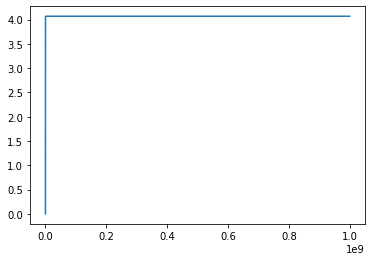

In [7]:
plt.plot(sol.t, sol.y[8])

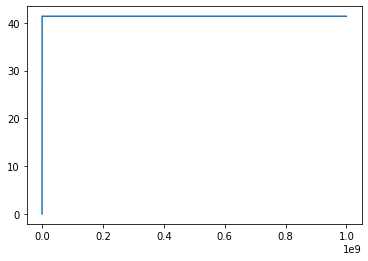

In [8]:
plt.plot(sol.t, sol.y[13])

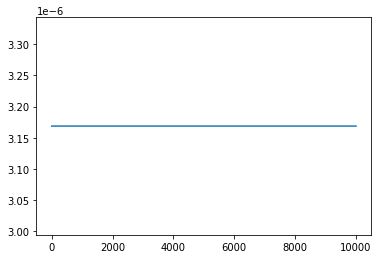

In [10]:
nutrient = np.arange(0, 1e4)
growth_rate = []
for s0 in nutrient:
    loop = solve_ivp(model, [t0, tf], init, args=(params,), method='Radau')
    Kgamma = gmax/Kp
    gamma = gmax*a/(Kgamma + a)
    ttrate = (rmq + rmr + rmp + rmt + rmm)*gamma
    lam = ttrate/M
    gamma = (gmax*loop.y[5][-1])/(Kgamma+loop.y[5][-1])
    ttrate = (loop.y[10][-1] + loop.y[11][-1] + loop.y[12][-1] + loop.y[13][-1] + loop.y[16][-1])*gamma
    lam = ttrate/M
    growth_rate.append(lam)

plt.plot(nutrient, growth_rate)

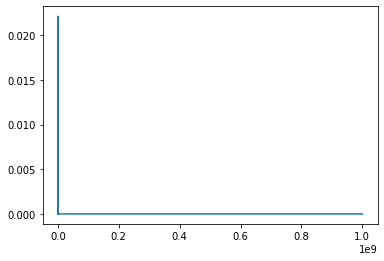

In [15]:
plt.plot(sol.t, sol.y[4])